In [1]:
import pandas as pd

df = pd.read_csv("ForLDA.csv")
df

Unnamed: 0                         SongTitle  \
0             0                  ...Ready for It?   
1             1                                22   
2             2            A Perfectly Good Heart   
3             3             A Place In This World   
4             4                         Afterglow   
..          ...                               ...   
158         158         ​r​ight where you left me   
159         159                        ​the lakes   
160         160  ​the last great american dynasty   
161         161                      ​tolerate it   
162         162             ​’tis the damn season   

                                           UniqueWords  
0    ['', '&', 'act', 'alcohol', 'alone', 'baby', '...  
1    ['', '&', '22', 'alcohol', 'alright', 'anyway'...  
2    ['anymore', 'apart', 'away', 'back', 'believe'...  
3    ['alone', 'ask', 'blue', 'cause', 'coming', 'c...  
4    ['afterglow', 'attack', 'away', 'back', 'behin...  
..                                                 ...  
158  ['', '&', 'alcohol', 'bear', 'born', 'break', ...  
159  ['and\u205fmy\u205fbeloved\u205fneither', 'aro...  
160  ['afternoon', 'american', 'bad', 'ballet', 'be...  
161  ['always', 'assume', 'barbed', 'battle', 'begg...  
162  ['ache', 'always', 'around', 'ask', 'asked', '...  

[163 rows x 3 columns]

In [2]:
empty_df = pd.DataFrame(columns=['SongTitle','Lyrics'])

for i, r in df.iterrows():
    list_for_row = []
    string_words = r[2][1:-1]
    string_words = string_words.replace("'", '')
    string_words = string_words.replace(",", '')
    string_words = string_words.replace("&", '')
    string_words = string_words.replace("  ", '')
    string_words = string_words.replace("\\", '')
    a = string_words.split(" ")
    for word in a:
        if 'u2005' in word:
            word = word.replace('u2005',' ')
            list_for_row.append(word)
        elif 'u205f' in word:
            word = word.replace('u205f',' ')
            list_for_row.append(word)
        elif 'xa0' in word:
            word = word.replace('xa0',' ')
            list_for_row.append(word)
        elif 'u200b' in word:
            word = word.replace('u200b',' ')
            list_for_row.append(word)
        else:
            list_for_row.append(word)
    empty_df.loc[len(empty_df)] = (r[1], list_for_row)

In [3]:
corpus_words = []
for i, r in empty_df.iterrows():
    for word in r[-1]:
        print(word)
        corpus_words.append(word)
corpus_words = set(corpus_words)
corpus_words #total dictionary of words

act
alcohol
alone
baby
begin
better
boys
breeze
burton
comparison
dont
dreams
eh
every
exes
failure
first
forever
forget
games
ghost
girls
go
gon
gonna
hard
haunted
hearts
heist
hes
hmm
holdin
i-island
im
island
ive
jailer
joeboy
join
keep
killer
knew
know
known
left
let
lights
like
love
loved
low
lyrics
man
many
meaning
middle
move
names
never
night
nothing
official
oh
one
phantom
ransom
ready
robber
running
saw
sayin
see
sip
sorry
stealing
take
tame
taylor
thief
things
though
time
touch
try
tryin
vendetta-ta
verified
well
wondered
youll
younger
22
alcohol
alright
anyway
bad
best
bet
breakfast
confused
cool
crowded
dancing
deadlines
ditch
dont
dreaming
dress
end
everything
ew
exes
fall
feeling
feels
forget
free
fun
gotta
happy
heartbreaks
hey!
hipsters
ill
im
instead
joeboy
keep
kids
know
like
lonely
look
love
lyrics
magical
make
many
meaning
midnight
miserable
news
next
night
nights
official
oh
oh-oh
one
ooh
perfect
place
scene
seems
sip
sleeping
strangers
swift
taylor
time
tonights


{'sirens',
 'unmoored',
 'greatest',
 'page',
 'ok',
 'flawless',
 'realizing',
 'trusted',
 'gap',
 'nowhere',
 'muse',
 'monsters',
 'sin',
 'teal',
 'mondays',
 'cap',
 'flickers',
 'embers',
 'flyin',
 'rocks at',
 'a.m.',
 'backyard',
 'giving',
 'attached',
 'ghostly',
 'sleeping',
 'gravity',
 'darkest',
 'jesus',
 'sunny',
 'frame',
 'suit',
 'sparkling',
 'flickering',
 'place pieces',
 'mm-mm-mm-mm',
 'perspective',
 'story',
 'speechless',
 'somethin',
 'contrarian',
 'sixteen',
 'you’ll',
 'battered',
 'comet',
 'breathe',
 'back we',
 'candle',
 'innocent',
 'wont',
 'seconds',
 'given',
 'trust',
 'nonchalant',
 'scooter',
 'searched',
 'crept',
 'messed',
 'eyes',
 'tore',
 'wonderstruck',
 'best',
 'future',
 'nothings',
 'burn!',
 'thankin',
 'thatll',
 'wear',
 'trusts',
 'scorpion',
 'karma',
 'scratch',
 'knew',
 'breath',
 'tying',
 'he-said',
 'mental',
 'game',
 'demons',
 'folklore',
 'heros',
 'tea',
 'listening',
 'paid',
 'brand-new',
 'narcissist',
 'brighte

In [4]:
empty_list_to_add = []
for i, r in empty_df.iterrows():
    empty_list_to_add.append(str(r[1][1:-1]))

In [5]:
empty_df['String'] = empty_list_to_add
empty_df

SongTitle  \
0                    ...Ready for It?   
1                                  22   
2              A Perfectly Good Heart   
3               A Place In This World   
4                           Afterglow   
..                                ...   
158         ​r​ight where you left me   
159                        ​the lakes   
160  ​the last great american dynasty   
161                      ​tolerate it   
162             ​’tis the damn season   

                                                Lyrics  \
0    [act, alcohol, alone, baby, begin, better, boy...   
1    [22, alcohol, alright, anyway, bad, best, bet,...   
2    [anymore, apart, away, back, believe, break, c...   
3    [alone, ask, blue, cause, coming, could, dont,...   
4    [afterglow, attack, away, back, behind, blame,...   
..                                                 ...   
158  [alcohol, bear, born, break, breakups, buried,...   
159  [and my beloved neither, around, auroras, bare...   
160  [afternoon, american, bad, ballet, beach, bets...   
161  [always, assume, barbed, battle, begging, beli...   
162  [ache, always, around, ask, asked, babe, back,...   

                                                String  
0    ['alcohol', 'alone', 'baby', 'begin', 'better'...  
1    ['alcohol', 'alright', 'anyway', 'bad', 'best'...  
2    ['apart', 'away', 'back', 'believe', 'break', ...  
3    ['ask', 'blue', 'cause', 'coming', 'could', 'd...  
4    ['attack', 'away', 'back', 'behind', 'blame', ...  
..                                                 ...  
158  ['bear', 'born', 'break', 'breakups', 'buried'...  
159  ['around', 'auroras', 'bare', 'bathe', 'belong...  
160  ['american', 'bad', 'ballet', 'beach', 'bets',...  
161  ['assume', 'barbed', 'battle', 'begging', 'bel...  
162  ['always', 'around', 'ask', 'asked', 'babe', '...  

[163 rows x 3 columns]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(empty_df['String']).toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_feature_names = vectorizer.get_feature_names()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# LDA Model

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [8]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [9]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [10]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0            ',            43.6       'like',            28.1       'like',   
1       'time',            14.9         'im',            27.4       'know',   
2       'like',            14.7       'know',            26.3       'love',   
3         'go',            14.5      'cause',            22.9       'said',   
4       'know',            13.8      'gonna',            22.2       'room',   
5      'still',            12.1        'say',            22.0      'never',   
6      'cause',            12.1       'dont',            20.4       'knew',   
7      'never',            11.6         'oh',            20.2         'im',   
8      'could',            11.1       'time',            19.6        'put',   
9         'im',            10.7       'love',            19.3         'go',   

  Topic 2 weights Topic 3 words Topic 3 weights  Topic 4 words  \
0            13.8       'dont',             8.4        'tell',   
1            12.7        'let',             7.3         'ive',   
2            11.5       'eyes',             7.0        'like',   
3            10.6       'ever',             6.8        'time',   
4            10.6       'like',             6.6         'got',   
5             9.7       'love',             6.5        'come',   
6             9.2         'go',             6.1          'im',   
7             9.2      'wanna',             6.1  'everything',   
8             8.8       'back',             5.6        'door',   
9             8.5       'make',             5.6        'take',   

  Topic 4 weights Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0             4.7      'heart',             7.4            ',            81.4   
1             4.1       'know',             5.7        'one',             9.1   
2             3.6        'ill',             5.5      'heart',             6.9   
3             3.3         'oh',             5.5      'didnt',             5.8   
4             3.1       'dont',             5.3      'think',             5.5   
5             3.0         'im',             4.8       'like',             4.9   
6             2.9       'even',             4.5       'want',             4.7   
7             2.7       'door',             4.4        'ive',             4.2   
8             2.6        'ive',             4.3         'im',             4.2   
9             2.5       'girl',             4.1       'dont',             3.9   

  Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words  \
0       'ever',             8.4       'know',            31.4       'like',   
1      'never',             6.4       'like',            27.6         'im',   
2         'im',             6.4         'im',            27.3        'got',   
3       'tell',             5.9         'oh',            26.8      'cause',   
4       'dont',             5.7        'get',            25.8        'one',   
5       'back',             5.7        'one',            24.4       'eyes',   
6      'every',             5.5       'cant',            22.8      'never',   
7      'didnt',             5.3       'dont',            22.1  'something',   
8       'last',             5.2      'cause',            21.9       'feel',   
9       'head',             5.1      'night',            21.4       'dont',   

  Topic 9 weights  
0            17.7  
1            16.6  
2            15.6  
3            15.4  
4            15.0  
5            14.9  
6            14.4  
7            14.0  
8            13.8  
9            13.3

In [11]:
a = model.perplexity(tf, sub_sampling=False)
a

119.26645347499765

In [12]:
#did something!

# Coherence and Perplexity for Repeating LDAs

In [13]:
!pip install gensim

  Using cached gensim-4.2.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)


In [14]:
#attempting coherence:
from gensim import corpora

lemmatized = [d.split() for d in empty_df.String]
id2word = corpora.Dictionary(lemmatized)
id2word

In [15]:
texts = lemmatized
corpus=[id2word.doc2bow(text) for text in texts]

In [20]:
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

In [21]:
LDA_p = []
LDA_c = []
for i in range(2,31):
    lda_model = gensim.models.LdaMulticore(corpus, id2word=id2word, num_topics = i)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, corpus=corpus, coherence='c_v')
    coherence=coherence_model.get_coherence()
    LDA_c.append(coherence)
    perplex = lda_model.log_perplexity(corpus)
    LDA_p.append(perplex)

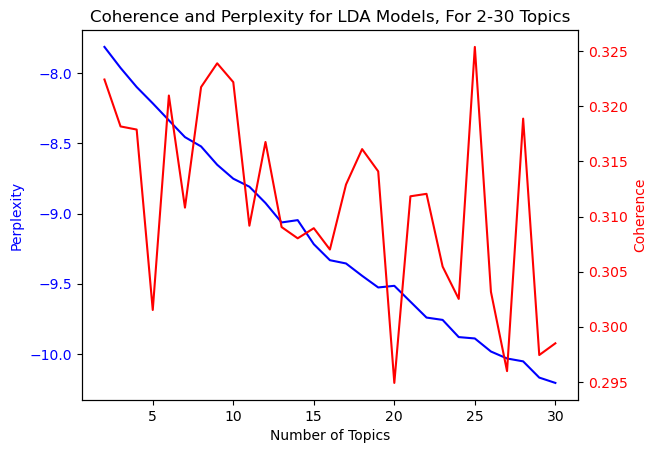

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(range(2,31), LDA_p, color='blue')
ax2 = ax1.twinx()
ax2.plot(range(2,31), LDA_c, color='r')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Perplexity")
ax1.set_ylabel('Perplexity', color = 'blue') 
ax2.set_ylabel('Coherence', color = 'r') 
ax1.tick_params(axis ='y', labelcolor = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'r') 
plt.title("Coherence and Perplexity for LDA Models, For 2-30 Topics")

plt.show()

In [23]:
#calculating a moving average to add to the graph:

window_size = 5
numbers_series = pd.Series(LDA_c)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()

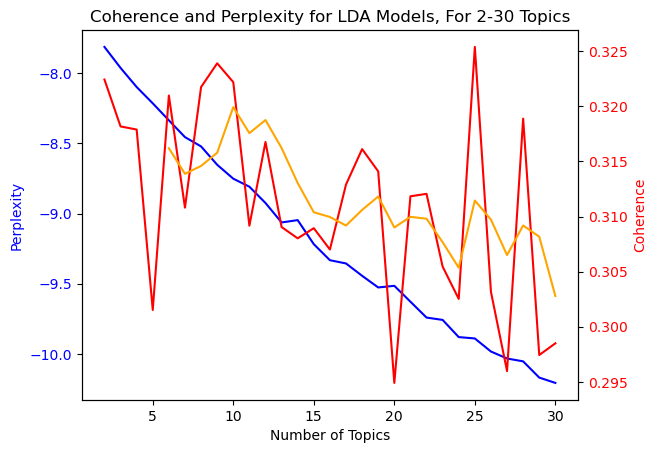

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), LDA_p, color='blue')
ax2 = ax1.twinx()
ax2.plot(range(2,31), LDA_c, color='r')
ax2.plot(range(2,31), moving_averages_list, color='orange')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Perplexity")
ax1.set_ylabel('Perplexity', color = 'blue') 
ax2.set_ylabel('Coherence', color = 'r') 
ax1.tick_params(axis ='y', labelcolor = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'r') 
plt.title("Coherence and Perplexity for LDA Models, For 2-30 Topics")

plt.show()

# NNMF

In [25]:
from sklearn.decomposition import NMF

In [26]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(empty_df['String']).toarray()
tf_feature_names = vectorizer.get_feature_names()

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
no_topics = 10

In [28]:
model = NMF(n_components=no_topics, random_state=0, alpha=.1, l1_ratio=.5)

In [29]:
model.fit(tf)

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=0)

In [31]:
nmf_features = model.transform(tf)

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


In [32]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [33]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0      'never',             1.4            ',             5.4         'go',   
1      'gonna',             1.3      'heart',             0.3       'love',   
2        'ill',             1.1         'im',             0.3        'let',   
3      'cause',             1.1        'one',             0.3        'see',   
4         'oh',             1.1       'know',             0.2       'mind',   
5        'see',             1.0       'like',             0.2      'never',   
6         'im',             0.9     'around',             0.2       'like',   
7       'know',             0.8       'home',             0.2       'good',   
8       'life',             0.7      'would',             0.2     'around',   
9       'come',             0.7       'want',             0.2       'away',   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0             1.9       'time',             1.5       'cant',             1.7   
1             1.6       'ever',             1.2        'one',             1.7   
2             1.0       'back',             1.2        'get',             1.6   
3             0.9      'still',             0.8      'think',             1.5   
4             0.9       'said',             0.8      'night',             0.9   
5             0.8      'never',             0.8     'things',             0.9   
6             0.8       'last',             0.7      'thing',             0.6   
7             0.7       'long',             0.7       'like',             0.5   
8             0.6       'know',             0.7        'see',             0.5   
9             0.6        'new',             0.7       'tell',             0.4   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0      'could',             1.5       'want',             1.5      'right',   
1        'say',             1.4       'tell',             1.1       'time',   
2         'oh',             1.0       'know',             1.0       'like',   
3        'way',             1.0       'dont',             0.9       'look',   
4        'got',             0.9        'ill',             0.9        'got',   
5       'know',             0.8       'home',             0.8       'face',   
6       'feel',             0.8       'look',             0.7     'around',   
7       'dont',             0.8       'keep',             0.7     'lights',   
8      'cause',             0.8       'make',             0.6        'one',   
9       'take',             0.7       'love',             0.6       'take',   

  Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words Topic 9 weights  
0             1.2        'say',             1.3        'ive',             2.3  
1             1.2       'dont',             1.3         'im',             1.0  
2             1.2       'back',             1.1      'leave',             0.9  
3             0.9         'oh',             1.0      'every',             0.9  
4             0.9  'something',             0.9         'go',             0.7  
5             0.9     'little',             0.9       'best',             0.7  
6             0.9       'eyes',             0.9       'well',             0.7  
7             0.8       'baby',             0.9       'come',             0.7  
8             0.8         'im',             0.8        'day',             0.6  
9             0.7       'away',             0.7       'room',             0.6

In [35]:
components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names()) 
components_df

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


',  'around',   'away',   'baby',   'back',   'best',  'better',  \
0  0.000000   0.000000  0.367920  0.334977  0.000000  0.141803   0.110551   
1  5.396966   0.203713  0.000000  0.026584  0.000000  0.079125   0.000000   
2  0.000000   0.597831  0.594720  0.000000  0.262490  0.000000   0.000000   
3  0.000000   0.000000  0.000000  0.093578  1.186547  0.000000   0.458061   
4  0.000000   0.000000  0.098720  0.000000  0.000000  0.075013   0.000000   
5  0.000000   0.000000  0.000000  0.000000  0.000000  0.005885   0.054086   
6  0.000000   0.000000  0.000000  0.000000  0.000000  0.086360   0.546030   
7  0.000000   0.870096  0.000000  0.000000  0.645863  0.053414   0.000000   
8  0.000000   0.047004  0.732889  0.892281  1.104396  0.000000   0.000000   
9  0.000000   0.000000  0.003364  0.236777  0.000000  0.716199   0.000000   

    'cant',  'cause',   'come',  ...  'things',  'think',   'time',   'town',  \
0  0.064671  1.091249  0.666345  ...   0.292673  0.147069  0.147466  0.169633   
1  0.087154  0.145269  0.135026  ...   0.000000  0.134026  0.130245  0.033826   
2  0.000000  0.071097  0.000000  ...   0.000000  0.550546  0.000000  0.118551   
3  0.000000  0.646034  0.235391  ...   0.000000  0.064565  1.478808  0.000000   
4  1.744315  0.319346  0.000000  ...   0.885500  1.540718  0.000000  0.199377   
5  0.526793  0.766469  0.103236  ...   0.132365  0.200660  0.000000  0.000000   
6  0.221937  0.194234  0.000000  ...   0.000000  0.000000  0.230721  0.000000   
7  0.000000  0.677856  0.263318  ...   0.268112  0.000000  1.233213  0.588978   
8  0.000000  0.082517  0.000000  ...   0.000000  0.000000  0.117417  0.000000   
9  0.000000  0.000000  0.656315  ...   0.097316  0.000000  0.343956  0.000000   

      'us',  'wanna',   'want',    'way',   'well',  'would',  
0  0.000000  0.494683  0.000000  0.353244  0.325646  0.071937  
1  0.071225  0.078908  0.180687  0.000000  0.000000  0.192032  
2  0.316772  0.353650  0.068798  0.000000  0.000000  0.000000  
3  0.002418  0.000000  0.000000  0.000000  0.000000  0.377320  
4  0.000000  0.000000  0.000000  0.000000  0.257682  0.000000  
5  0.141060  0.204732  0.414105  0.974013  0.000000  0.452468  
6  0.000000  0.178078  1.453629  0.000000  0.000000  0.013340  
7  0.575299  0.000000  0.000000  0.000000  0.000000  0.007950  
8  0.109553  0.398879  0.000000  0.633658  0.343748  0.000000  
9  0.000000  0.000000  0.064705  0.000000  0.714015  0.007738  

[10 rows x 87 columns]

In [39]:
import statistics
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print("Mean:", statistics.mean(tmp.nlargest(10)))
    print('\n')

For topic 1 the words with the highest value are:
'never',    1.395333
'gonna',    1.256822
'ill',      1.110775
'cause',    1.091249
'oh',       1.059480
'see',      1.018355
'im',       0.890149
'know',     0.812977
'life',     0.666617
'come',     0.666345
Name: 0, dtype: float64
Mean: 0.9968101451673247


For topic 2 the words with the highest value are:
',           5.396966
'heart',     0.320326
'im',        0.295434
'one',       0.273034
'know',      0.247454
'like',      0.226507
'around',    0.203713
'home',      0.192115
'would',     0.192032
'want',      0.180687
Name: 1, dtype: float64
Mean: 0.7528266900955269


For topic 3 the words with the highest value are:
'go',        1.859952
'love',      1.560108
'let',       1.015342
'see',       0.880112
'mind',      0.853493
'never',     0.834531
'like',      0.776379
'good',      0.684360
'around',    0.597831
'away',      0.594720
Name: 2, dtype: float64
Mean: 0.9656826523781029


For topic 4 the words with the highest value ar

In [33]:
#NNMF done too!

# Repeating NNMFs

In [41]:
list_avg_highest_value = []
for i in range(2,31):
    small_list = []
    model = NMF(n_components=i, random_state=0, alpha=.1, l1_ratio=.5)
    model.fit(tf)
    nmf_features = model.transform(tf)
    components_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names()) 
    for topic in range(components_df.shape[0]):
        tmp = components_df.iloc[topic]
        small_list.append(statistics.mean(tmp.nlargest(10)))
    list_avg_highest_value.append(statistics.mean(small_list))

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecat

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, wh

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, wh

/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, wh

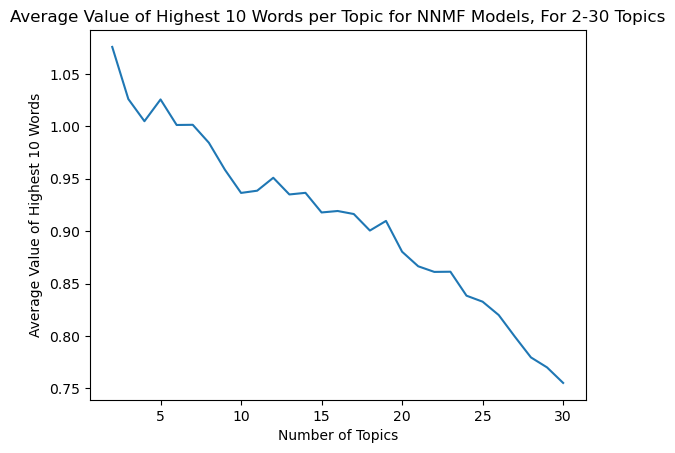

In [45]:
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), list_avg_highest_value)
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Average Value of Highest 10 Words")
plt.title("Average Value of Highest 10 Words per Topic for NNMF Models, For 2-30 Topics")

plt.show()

# BTM

In [34]:
!pip install bitermplus

Processing /home/jovyan/.cache/pip/wheels/c4/f8/be/52cc190012530001ba15fe9f5f05785623f964940b2f1550c5/bitermplus-0.6.12-cp38-cp38-linux_x86_64.whl
  Using cached Cython-0.29.32-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)


In [35]:
empty_df

SongTitle  \
0                    ...Ready for It?   
1                                  22   
2              A Perfectly Good Heart   
3               A Place In This World   
4                           Afterglow   
..                                ...   
158         ​r​ight where you left me   
159                        ​the lakes   
160  ​the last great american dynasty   
161                      ​tolerate it   
162             ​’tis the damn season   

                                                Lyrics  \
0    [act, alcohol, alone, baby, begin, better, boy...   
1    [22, alcohol, alright, anyway, bad, best, bet,...   
2    [anymore, apart, away, back, believe, break, c...   
3    [alone, ask, blue, cause, coming, could, dont,...   
4    [afterglow, attack, away, back, behind, blame,...   
..                                                 ...   
158  [alcohol, bear, born, break, breakups, buried,...   
159  [and my beloved neither, around, auroras, bare...   
160  [afternoon, american, bad, ballet, beach, bets...   
161  [always, assume, barbed, battle, begging, beli...   
162  [ache, always, around, ask, asked, babe, back,...   

                                                String  
0    ['alcohol', 'alone', 'baby', 'begin', 'better'...  
1    ['alcohol', 'alright', 'anyway', 'bad', 'best'...  
2    ['apart', 'away', 'back', 'believe', 'break', ...  
3    ['ask', 'blue', 'cause', 'coming', 'could', 'd...  
4    ['attack', 'away', 'back', 'behind', 'blame', ...  
..                                                 ...  
158  ['bear', 'born', 'break', 'breakups', 'buried'...  
159  ['around', 'auroras', 'bare', 'bathe', 'belong...  
160  ['american', 'bad', 'ballet', 'beach', 'bets',...  
161  ['assume', 'barbed', 'battle', 'begging', 'bel...  
162  ['always', 'around', 'ask', 'asked', 'babe', '...  

[163 rows x 3 columns]

In [36]:
texts = empty_df['String'].str.strip().tolist()

In [37]:
import bitermplus as btm
import numpy as np


# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)

In [38]:
model = btm.BTM(X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

100%|██████████| 163/163 [00:00<00:00, 520694.25it/s]


In [39]:
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)

In [40]:
coherence = model.coherence_
coherence

array([-220.21647633, -165.39389014, -131.44682532, -272.6668643 ,
       -165.39389014, -165.39389014, -165.39389014, -149.1633251 ])

In [41]:
perplexity

2.699741429731348

In [43]:
btm.get_docs_top_topic(texts, model.matrix_docs_topics_)

documents  label
0    ['alcohol', 'alone', 'baby', 'begin', 'better'...      0
1    ['alcohol', 'alright', 'anyway', 'bad', 'best'...      0
2    ['apart', 'away', 'back', 'believe', 'break', ...      0
3    ['ask', 'blue', 'cause', 'coming', 'could', 'd...      0
4    ['attack', 'away', 'back', 'behind', 'blame', ...      0
..                                                 ...    ...
158  ['bear', 'born', 'break', 'breakups', 'buried'...      0
159  ['around', 'auroras', 'bare', 'bathe', 'belong...      3
160  ['american', 'bad', 'ballet', 'beach', 'bets',...      7
161  ['assume', 'barbed', 'battle', 'begging', 'bel...      0
162  ['always', 'around', 'ask', 'asked', 'babe', '...      0

[163 rows x 2 columns]

In [44]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 0, 3, 7, 0, 0])

# Function for repeating BTMs

In [45]:
BTM_perplexities = []
BTM_co = []
def BTM_run(num_topics):
    X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
    tf = np.array(X.sum(axis=0)).ravel()
    docs_vec = btm.get_vectorized_docs(texts, vocabulary)
    docs_lens = list(map(len, docs_vec))
    biterms = btm.get_biterms(docs_vec)
    model = btm.BTM(X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
    model.fit(biterms, iterations=num_topics)
    p_zd = model.transform(docs_vec)
    BTM_perplexities.append(btm.perplexity(model.matrix_topics_words_, p_zd, X, 8))
    BTM_co.append(btm.coherence(model.matrix_topics_words_, X, M=20))

In [46]:
for i in range(2,31):
    BTM_run(i)

100%|██████████| 163/163 [00:00<00:00, 570201.46it/s]


In [47]:
#clean coherences:
BTM_co_plot=[]
from statistics import mean

for i in BTM_co:
    list_from_co = i.tolist()
    BTM_co_plot.append(mean(list_from_co))
    
BTM_co_plot

[-175.13922703016937,
 -176.45042905593942,
 -179.74571082157615,
 -172.63111745567014,
 -181.73884686979056,
 -183.19251190306613,
 -183.19251190306613,
 -179.00058123460937,
 -185.9586522418913,
 -181.73884686979056,
 -187.01182350333542,
 -178.44356510415386,
 -184.1234111430541,
 -187.01182350333542,
 -178.44356510415386,
 -182.26287670442315,
 -182.26287670442315,
 -181.73884686979056,
 -179.38363145084526,
 -181.7388468697906,
 -183.1925119030661,
 -187.01182350333542,
 -187.9644617013273,
 -178.44356510415386,
 -183.64370119749037,
 -178.44356510415386,
 -183.20352805573094,
 -178.44356510415386,
 -187.42333342783166]

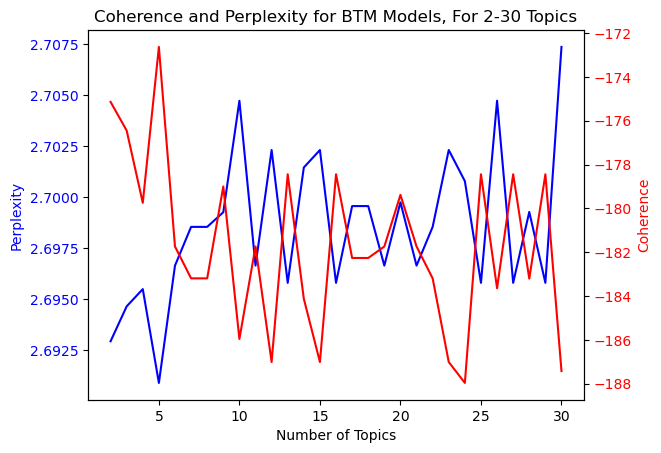

In [48]:
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), BTM_perplexities, color='blue')
ax2 = ax1.twinx()
ax2.plot(range(2,31), BTM_co_plot, color='r')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Perplexity")
ax1.set_ylabel('Perplexity', color = 'blue') 
ax2.set_ylabel('Coherence', color = 'r') 
ax1.tick_params(axis ='y', labelcolor = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'r') 
plt.title("Coherence and Perplexity for BTM Models, For 2-30 Topics")

plt.show()

In [49]:
#calculating a moving average to add to the graph:

window_size = 5
numbers_series = pd.Series(BTM_co_plot)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
ma_co = moving_averages.tolist()

numbers_series = pd.Series(BTM_perplexities)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
ma_p = moving_averages.tolist()

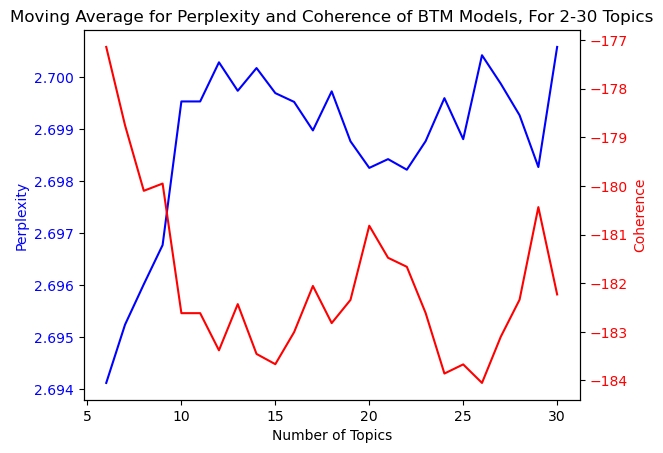

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), ma_p, color='blue')
ax2 = ax1.twinx()
ax2.plot(range(2,31), ma_co, color='r')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Perplexity")
ax1.set_ylabel('Perplexity', color = 'blue') 
ax2.set_ylabel('Coherence', color = 'r') 
ax1.tick_params(axis ='y', labelcolor = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'r') 
plt.title("Moving Average for Perplexity and Coherence of BTM Models, For 2-30 Topics")

plt.show()

# CorEx

In [51]:
df = pd.read_csv("SetIndexMatrix.csv")
df

SongTitle  1  16  16th  17  18  1:58  2  20  \
0                    ...Ready for It?  0   0     0   0   0     0  0   0   
1                                  22  0   0     0   0   0     0  0   0   
2              A Perfectly Good Heart  0   0     0   0   0     0  0   0   
3               A Place In This World  0   0     0   0   0     0  0   0   
4                           Afterglow  0   0     0   0   0     0  0   0   
..                                ... ..  ..   ...  ..  ..   ... ..  ..   
158         ​r​ight where you left me  0   0     0   0   0     0  0   0   
159                        ​the lakes  0   0     0   0   0     0  0   0   
160  ​the last great american dynasty  0   0     0   0   0     0  0   0   
161                      ​tolerate it  0   0     0   0   0     0  0   0   
162             ​’tis the damn season  0   0     0   0   0     0  0   0   

     20-year  ...  younger  youre  yourе  youve  you’ll  you’re  you”  ‘cause  \
0          0  ...        1      0      0      0       0       0     0       0   
1          0  ...        0      0      0      0       0       0     0       0   
2          0  ...        0      0      0      0       0       0     0       0   
3          0  ...        0      0      0      0       0       0     0       0   
4          0  ...        0      1      0      0       0       0     0       0   
..       ...  ...      ...    ...    ...    ...     ...     ...   ...     ...   
158        0  ...        0      1      0      0       0       0     0       0   
159        0  ...        0      0      0      0       0       0     0       0   
160        0  ...        0      0      0      0       0       0     0       0   
161        0  ...        0      1      0      0       0       0     0       0   
162        0  ...        0      0      0      0       0       0     0       0   

     ‘round  ’cause  
0         0       0  
1         0       0  
2         0       0  
3         0       0  
4         0       0  
..      ...     ...  
158       0       0  
159       0       0  
160       0       0  
161       0       0  
162       0       0  

[163 rows x 3442 columns]

In [52]:
df = df.set_index("SongTitle")
df

1  16  16th  17  18  1:58  2  20  20-year  \
SongTitle                                                                     
...Ready for It?                  0   0     0   0   0     0  0   0        0   
22                                0   0     0   0   0     0  0   0        0   
A Perfectly Good Heart            0   0     0   0   0     0  0   0        0   
A Place In This World             0   0     0   0   0     0  0   0        0   
Afterglow                         0   0     0   0   0     0  0   0        0   
...                              ..  ..   ...  ..  ..   ... ..  ..      ...   
​r​ight where you left me         0   0     0   0   0     0  0   0        0   
​the lakes                        0   0     0   0   0     0  0   0        0   
​the last great american dynasty  0   0     0   0   0     0  0   0        0   
​tolerate it                      0   0     0   0   0     0  0   0        0   
​’tis the damn season             0   0     0   0   0     0  0   0        0   

                                  22  ...  younger  youre  yourе  youve  \
SongTitle                             ...                                 
...Ready for It?                   0  ...        1      0      0      0   
22                                 1  ...        0      0      0      0   
A Perfectly Good Heart             0  ...        0      0      0      0   
A Place In This World              0  ...        0      0      0      0   
Afterglow                          0  ...        0      1      0      0   
...                               ..  ...      ...    ...    ...    ...   
​r​ight where you left me          0  ...        0      1      0      0   
​the lakes                         0  ...        0      0      0      0   
​the last great american dynasty   0  ...        0      0      0      0   
​tolerate it                       0  ...        0      1      0      0   
​’tis the damn season              0  ...        0      0      0      0   

                                  you’ll  you’re  you”  ‘cause  ‘round  ’cause  
SongTitle                                                                       
...Ready for It?                       0       0     0       0       0       0  
22                                     0       0     0       0       0       0  
A Perfectly Good Heart                 0       0     0       0       0       0  
A Place In This World                  0       0     0       0       0       0  
Afterglow                              0       0     0       0       0       0  
...                                  ...     ...   ...     ...     ...     ...  
​r​ight where you left me              0       0     0       0       0       0  
​the lakes                             0       0     0       0       0       0  
​the last great american dynasty       0       0     0       0       0       0  
​tolerate it                           0       0     0       0       0       0  
​’tis the damn season                  0       0     0       0       0       0  

[163 rows x 3441 columns]

In [53]:
!pip install corextopic

import numpy as np
import scipy.sparse as ss

import corextopic.corextopic as ct
import corextopic.vis_topic as vt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

  Using cached corextopic-1.1-py3-none-any.whl (27 kB)


In [54]:
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape

(3441, 3183)

In [55]:
words = list(np.asarray(vectorizer.get_feature_names()))
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape

/opt/conda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(3441, 3174)

In [56]:
#attempt at CorEx #1:

anchor_words = ['time','love','dancing','shake','feel','night','girl','bad','home','break']

anchored_topic_model = ct.Corex(n_hidden=10, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=2)
anchored_topic_model.tc

0.07173314745931232

In [57]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: time, open, trip, trippin, heart, stopping, shut, ride, rich, rhyme
1: love, ex, chorus, self, wide, switch, pink, struck, saint, cross
2: dancing, 4th, rose, romeo, roll, risk, ridin, revolved, rovers, request
3: la, shake, saw, paid, pane, perfectly, place, playground, poker, precipice
4: feel, 9th, price, prison, promised, pub, rains, rainstorm, realizing, receipt
5: mm, mmm, jet, set, night, huh, playful, playthings, pinned, pin
6: eighty, forgotten, twist, seven, mind, faith, girl, reputations, politе, riviera
7: double, crossed, brand, new, coming, skippin, deep, knee, skip, wrapped
8: oh, ah, ha, whoa, home, easy, catching, like, ahh, uh
9: ooh, dead, small, end, town, horse, onе, band, break, aids


In [58]:
#attempt at CorEx #2:

songs = df.index.values.tolist()
docs=songs
anchor_words = [['heart'],['love']]
anchored_topic_model = ct.Corex(n_hidden=10, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=2)
anchored_topic_model.tc

0.055414801997376625

In [59]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: heart, wrapped, open, stopping, horse, eighty, new, onе, brand, trip
1: love, ex, chorus, self, da, struck, switch, pink, cross, hide


# Iterating Over t

In [60]:
#t = 2-8

anchor_words = ['love','like']
to_graph_strength = []
for topic_number in range(2,8):
    anchored_topic_model = ct.Corex(n_hidden=topic_number, seed=2)
    anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=2)
    strength=anchored_topic_model.tc
    to_graph_strength.append(strength)
    for n in range(topic_number):
        topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
        #print('{}: '.format(n) + ', '.join(topic_words))

In [61]:
#t = 8-15

anchor_words=['love','like','man','girl','hurt','missing','hurt']
for topic_number in range(8,15):
    anchored_topic_model = ct.Corex(n_hidden=topic_number, seed=2)
    anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=2)
    strength=anchored_topic_model.tc
    to_graph_strength.append(strength)
    for n in range(topic_number):
        topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
        #print('{}: '.format(n) + ', '.join(topic_words))

In [62]:
#t = 15-30

anchor_words=['love','like','man','girl','hurt','missing','hurt','oh','bad','good']
for topic_number in range(15,31):
    anchored_topic_model = ct.Corex(n_hidden=topic_number, seed=2)
    anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=2)
    strength=anchored_topic_model.tc
    to_graph_strength.append(strength)
    for n in range(topic_number):
        topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
        #print('{}: '.format(n) + ', '.join(topic_words))

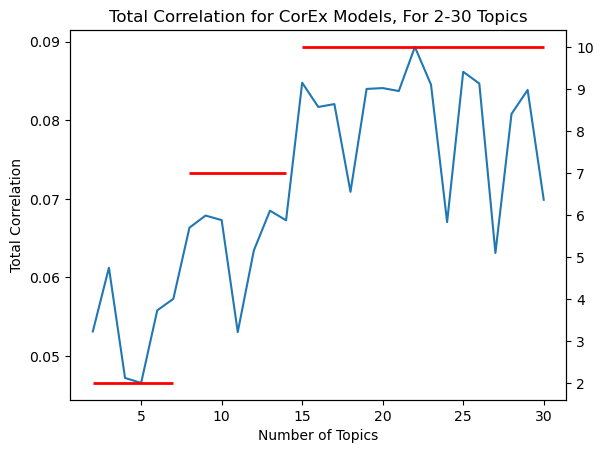

In [63]:
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), to_graph_strength)
ax2 = ax1.twinx()
ax2.hlines(y=2, xmin=2, xmax=7, linewidth=2, color='r')
ax2.hlines(y=7, xmin=8, xmax=14, linewidth=2, color='r')
ax2.hlines(y=10, xmin=15, xmax=30, linewidth=2, color='r')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Total Correlation")
plt.title("Total Correlation for CorEx Models, For 2-30 Topics")

plt.show()

In [64]:
#calculating a moving average to add to the graph:

window_size = 5
numbers_series = pd.Series(to_graph_strength)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
final_list = moving_averages_list[window_size - 1:]
  
fig, ax1 = plt.subplots()
ax1.plot(range(2,31), to_graph_strength)
ax1.plot(range(2,31), moving_averages_list)
ax2 = ax1.twinx()
ax2.hlines(y=2, xmin=2, xmax=7, linewidth=2, color='r')
ax2.hlines(y=7, xmin=8, xmax=14, linewidth=2, color='r')
ax2.hlines(y=10, xmin=15, xmax=30, linewidth=2, color='r')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Total Correlation")
plt.title("Total Correlation for CorEx Models, For 2-30 Topics")

plt.show()

# Unsupervised CorEx (to compare tc magnitude)

In [65]:
df = pd.read_csv("SetIndexMatrix.csv")
df = df.set_index("SongTitle")
docs = df.index.values.tolist()
words = list(df.columns.values)
import numpy as np
X = np.array(df)
topic_model = ct.Corex(n_hidden=10, seed=2)
topic_model.fit(X, words=words, docs=docs)
topic_model.tc

31.196959505766184

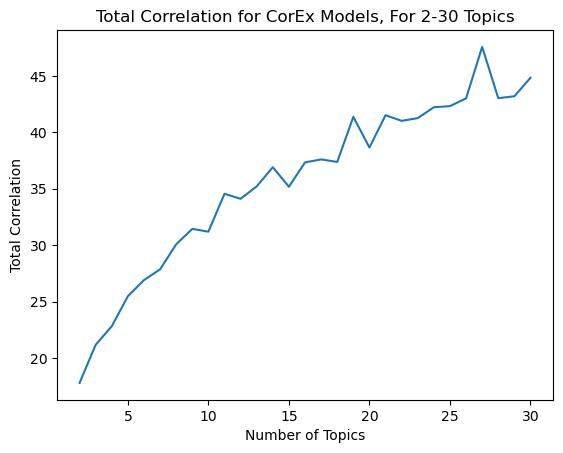

In [66]:
docs = df.index.values.tolist()
words = list(df.columns.values)

tc_plain = []
for i in range(2,31):
    topic_model = ct.Corex(n_hidden=i, seed=2)
    topic_model.fit(X, words=words, docs=docs)
    tc_plain.append(topic_model.tc)
    
plt.plotfig, ax1 = plt.subplots()
ax1.plot(range(2,31), tc_plain)
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel("Total Correlation")
plt.title("Total Correlation for CorEx Models, For 2-30 Topics")

plt.show()